In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import integrate
from scipy import interpolate
from scipy import signal
from scipy import special
from scipy import constants
from scipy import linalg
from scipy import fftpack
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import find_peaks_cwt
from scipy.signal import argrelextrema
import fnmatch
import scipy as sp


In [2]:
data = np.loadtxt('reubensdata.txt', skiprows=2)
t = data[:,0]
x = data[:,1]
# print(max(x))
x_true = x+(1/2*(max(x)-min(x)))

x_t_lim = x_true[0:563]
t_lim = t[0:563]
# x_t_lim2 = x_true[750:1500]
# print(max(x_t_lim))
# print(max(x_t_lim2))


In [3]:
# xx = str(x_true)

# xxx = np.zeros(10)
# fitered = fnmatch.filter(xx, '0.0?')
# filter = np.array(fitered)
# np.append(xxx,filter)

# # print(xx)


# import re
# regex = re.compile('0.0[0-9]')
# l = str(x_true)
# matches = [string for string in l if re.match(regex, string)]
# print(matches)

[17.94735706  0.95467533  3.83604735]


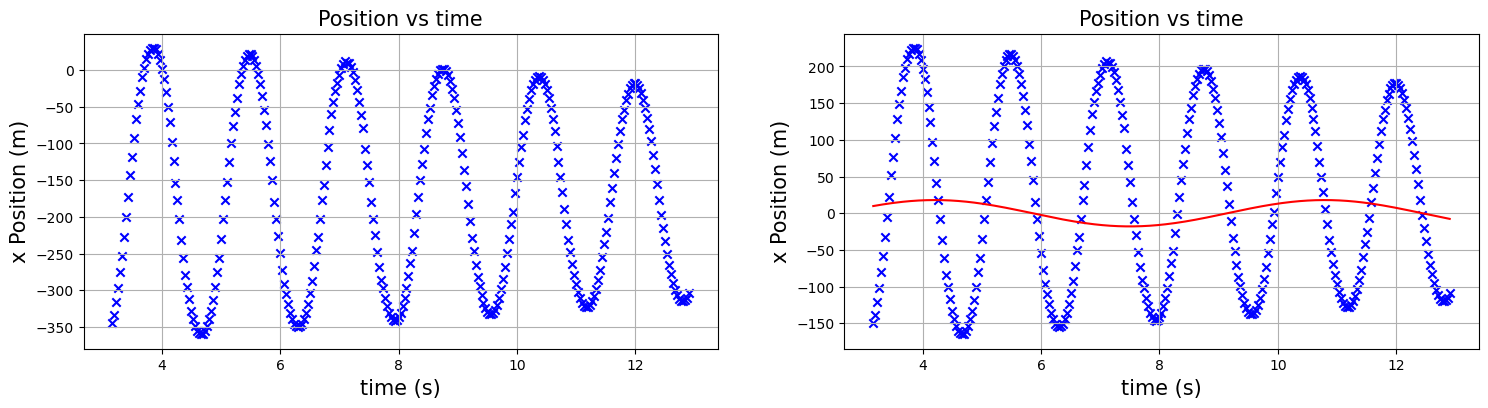

In [4]:
text_size_plots = 15
text_size_axes = 15



def best_fit(x_true, a, b, c):
    return a*(np.sin(b*x_true+c))

params, params_covariance = curve_fit(best_fit, t, x_true, p0=[1, 1, 1])
print(params)



plt.figure(figsize=(18,9))



plt.subplot(221)
plt.scatter(t,x,marker="x",color="b",)
plt.grid(True)
plt.title("Position vs time", size=text_size_plots)
plt.xlabel("time (s)", size=text_size_plots)
plt.ylabel("x Position (m)", size=text_size_plots)

plt.subplot(222)
plt.scatter(t_lim,x_t_lim,marker="x",color="b",)
plt.plot(t, best_fit(t, params[0], params[1], params[2]), color='r')
plt.grid(True)
plt.title("Position vs time", size=text_size_plots)
plt.xlabel("time (s)", size=text_size_plots)
plt.ylabel("x Position (m)", size=text_size_plots)



plt.show()


In [11]:
x_peaks, peak = sp.signal.find_peaks(x_t_lim, height=0.01, distance=30)
T1 = np.ones(0)
print(x_peaks)
print(peak)
for i in x_peaks:
    print(t[i])
    T1 = np.append(T1,t[i])

T = T1 - 3.833
print(T)
print(T[0])
print(T[1])
print(T[2]/2)
print(T[3]/3)
print(T[4]/4)
print(T[5]/5)
# print(T[6]/6)
# print(T[7]/7)
# print(T[8]/8)
# print(T[9]/9)
T_f = (T[0]+T[1]+T[2]/2+T[3]/3+T[4]/4+T[5]/5)/5
print()
print()
print()



print(f'The mean Period of motion is {T_f:.4f}s')


[ 20  70 118 167 216 264]
{'peak_heights': array([225.085, 216.955, 206.995, 197.112, 187.134, 177.425])}
3.833
5.5
7.1
8.733
10.367
11.967
[0.    1.667 3.267 4.9   6.534 8.134]
0.0
1.6669999999999998
1.6334999999999997
1.6333333333333335
1.6335000000000002
1.6268



The mean Period of motion is 1.6388s


In [12]:
L = 0.16
g = (4*(np.pi**2)*L)/((T_f)**2)
print(f'The value of g is {g:.4f}m/s^2')

The value of g is 2.3519m/s^2


In [80]:
# v = np.ones(10)

# for k in (x_true):
#     if k == 0:
#         print(k)

# print(x_true)

In [81]:
avg_x = np.average(x)
x_scaled = (x-avg_x)



period_i = 0
period_f = 1548
t_p = t[period_i:period_f]
x_p = x[period_i:period_f]
t_x_p =argrelextrema(x_p, np.greater_equal)
x_p[argrelextrema(x_p, np.greater_equal)[0]]

array([  29.99 ,   29.99 ,   21.86 ,   11.9  ,    2.017,   -7.961,
        -17.67 ,  -17.67 , -304.1  ])

In [100]:
rel_peak = np.zeros(period_f-period_i-1)
rel_peak_no = np.zeros(period_f-period_i-1)

for l in range (0,period_f-period_i-1):
    if (x_p[l-1]>x_p[l] and x_p[l+1]>x_p[l]):
        rel_peak[l]=x_p[l]
    elif (x_p[l-1]>x_p[l] and x_p[l+1]==x_p[l]) or (x_p[l-1]==x_p[l] and x_p[l+1]>x_p[l]):
            rel_peak_no[l]=x_p[l]
            
peak = np.nonzero(rel_peak)
no_peak = np.nonzero(rel_peak_no)
print ("identified peaks at",peak)
print("not sure on",no_peak)


identified peaks at (array([   0,    4,    8,   13,   22,   66,  172,  226,  241,  346,  348,
        649,  671,  675,  694,  703,  705,  707,  713,  718,  722,  728,
        734,  738,  741,  746,  749,  753,  758,  765,  767,  770,  778,
        806,  834,  928,  937,  975,  985,  994, 1003, 1009, 1011, 1029,
       1031, 1042, 1047, 1049, 1058, 1061, 1063, 1067, 1070, 1073, 1080,
       1082, 1089, 1092, 1096, 1101, 1105, 1115, 1132, 1134, 1144, 1176,
       1405, 1407, 1411, 1415, 1419, 1421, 1423, 1425, 1429, 1460, 1462,
       1468, 1478, 1494, 1509, 1518], dtype=int64),)
not sure on (array([  2, 668, 669, 679, 683, 685, 690, 691, 698, 700], dtype=int64),)


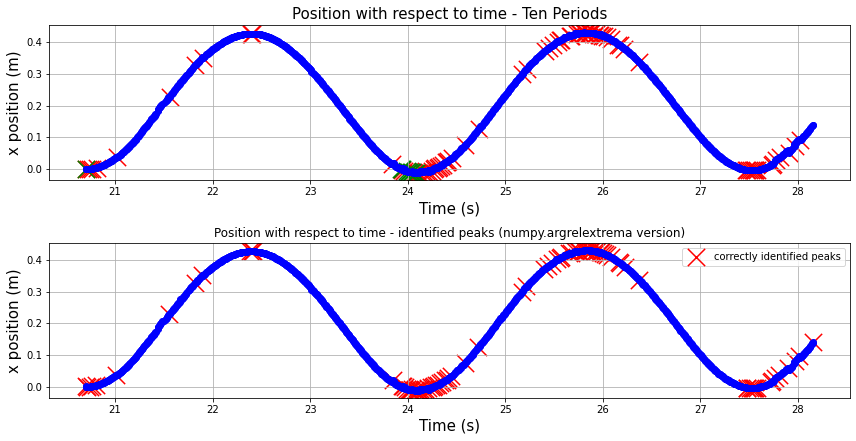

In [101]:
plt.figure(figsize=(12,9))

plt.subplot(312)
plt.plot(t_p,x_p,marker="o",color="b")
plt.grid(True)
plt.scatter(t_p[peak],x_p[peak],marker="x",color="r",s=300, label="correctly identified peak")
plt.scatter(t_p[no_peak],x_p[no_peak],marker="x",color="g",s=300, label="possible peak")
plt.title("Position with respect to time - Ten Periods", size=text_size_plots)
plt.xlabel("Time (s)", size=text_size_plots)
plt.ylabel("x position (m)", size=text_size_plots)


plt.subplot(313)
plt.plot(t_p,x_p,marker="o",color="b")
plt.grid(True)
plt.scatter(t_p[t_x_p],x_p[argrelextrema(x_p, np.greater_equal)[0]], marker="x",color="r",s=300, label="correctly identified peaks")
plt.title("Position with respect to time - identified peaks (numpy.argrelextrema version)")
plt.xlabel("Time (s)", size=text_size_plots)
plt.ylabel("x position (m)", size=text_size_plots)
plt.legend()
plt.ylim()

plt.tight_layout()
plt.show()

In [102]:
period = np.zeros(np.size(peak))
for z in range(0,np.size(peak)-1):
    period[z] = t_p[peak[0][z+1]]-t_p[peak[0][z]]
print("the period is:",period)
mode = np.median(period)
print("the mode is:",mode)
mean = np.mean(period)
print("the mean is:",mean)

the period is: [0.02834 0.02166 0.02    0.04667 0.20333 0.54334 0.26166 0.075   0.49667
 0.00833 1.44    0.10334 0.01833 0.095   0.03833 0.00834 0.01166 0.025
 0.02167 0.025   0.025   0.03333 0.01667 0.01167 0.03    0.01166 0.02167
 0.02    0.03333 0.00834 0.01333 0.03667 0.13833 0.13833 0.445   0.05
 0.18    0.04167 0.04167 0.05    0.025   0.00833 0.09167 0.01666 0.055
 0.02    0.00834 0.04666 0.01167 0.00833 0.025   0.01334 0.01166 0.03834
 0.01333 0.02833 0.01667 0.02167 0.02    0.02166 0.04167 0.07833 0.01334
 0.04166 0.15834 1.09666 0.00834 0.01666 0.025   0.02167 0.00833 0.00834
 0.00833 0.02    0.14667 0.00833 0.03333 0.045   0.085   0.07    0.04667
 0.     ]
the mode is: 0.02499999999999858
the mean is: 0.08928865853658538


In [103]:
m = stats.mode(period)
print(m)

ModeResult(mode=array([0.00833]), count=array([5]))
